# Prediccion de Precios de Carros

Creacion de un modelo de Machine Learning para predecir los precios de los carros en el mercado estadounidense. El objetivo es ayudar a nuevos integrantes a comprender factores de precios importantes en este mercado.

# Seccion 1. Analisis y exploracion de los datos

## Librerias

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gestion de advertencias

In [348]:
import warnings

# ignora advertencias sobre funcionalidades que se van a dejar de usar
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignora advertencias sobre problemas en tiempo de ejecucion
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Cargar datos

In [349]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [350]:
# resumen por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Las 26 variables estan libres de valores faltantes. Existen 205 registros

## Entendiendo las variables predictoras

### **Symboling**

Hace referencia al riesgo del auto y va en una escala de -2 a 3,siendo el -2 menos riesgoso y 3 mas riesgoso.

In [351]:
# Categorias de la variable Symboling
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [352]:
# porcentaje de las diferentes categorias de symboling
df['symboling'].value_counts(normalize=True)*100

 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64

- La mayoria de los carros son 0, 1, 2, es decir con un riesgo considerable

- Son pocos los carros con bajo riesgo (-2)

### **Aspiration**

Es una propiedad del motor (de combustion interna) que muestra si la ingesta de oxigeno es estandar (presion atmosferica) o mediante turbocompresor (entrada de oxigeno a presion)

In [353]:
# categorias de la variable aspiration
df['aspiration'].value_counts(normalize=True)*100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

- El 81.9% de los carros son de ingesta de oxigeno estandar
- El 18.1% son de turbocompresor

### **Drivewheel**

Hace referencia a la rueda de traccion del carro: rueda delantera (frontwheel), rueda trasera (rear wheel) o traccion en las cuatro ruedas (four-wheel drive).

In [354]:
df['drivewheel'].value_counts(normalize=True)*100

fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

- El 58.3% de los carros son de traccion delantera
- El 37.1% son de traccion trasera
- El 4.4% son de traccion en las 4 ruedas.

### **Wheelbase**

Es la distancia entre el centro de las ruedas delanteras y traseras.

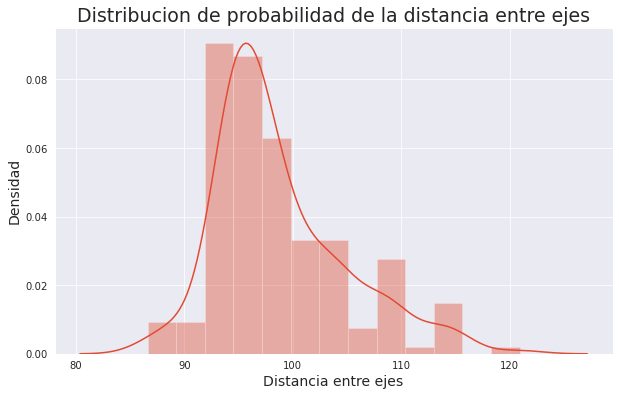

In [355]:
# como es una variable numerica, veamos su distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['wheelbase'])
plt.grid(True)
plt.xlabel('Distancia entre ejes', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Distribucion de probabilidad de la distancia entre ejes', fontsize= 19);

- La mayoria de los carros tienen una distancia entre ejes entre 92.5 y 97.5 

### **Curbweight**

Peso del carro sin ocupantes ni equipajes

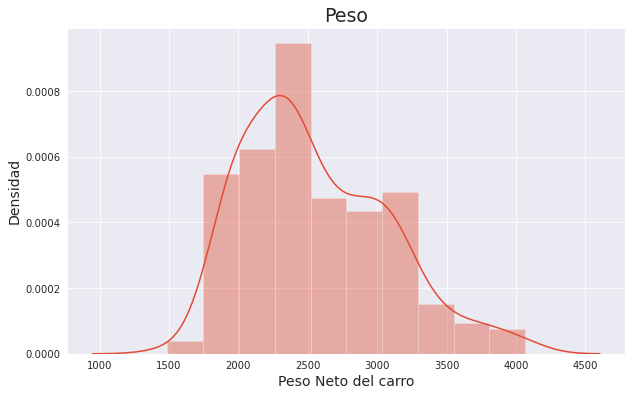

In [356]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['curbweight'])
plt.grid(True)
plt.xlabel('Peso Neto del carro', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Peso', fontsize= 19);

- La mayoria de los carros pesan entre 2000 y 2500.

### **Stroke**

Es el volumen del motor (distancia recorrida por el piston en cada ciclo)

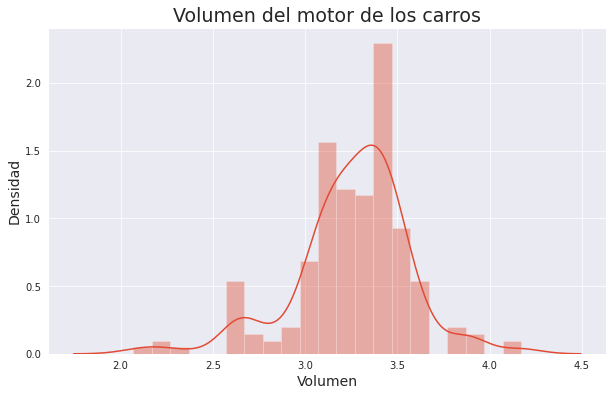

In [357]:
# distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['stroke'])
plt.grid(True)
plt.xlabel('Volumen', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Volumen del motor de los carros', fontsize= 19);

- Hay una gran cantidad de carros con volumen de motor de 3.4.

### **Compression ration**

Relacion de volumen de la camara de compresion de mayor a menor capacidad

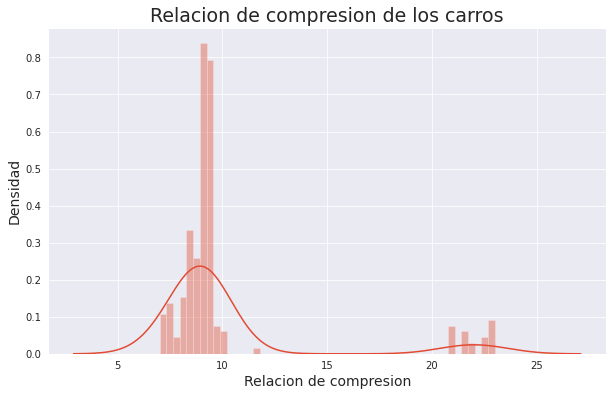

In [358]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['compressionratio'])
plt.grid(True)
plt.xlabel('Relacion de compresion', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Relacion de compresion de los carros', fontsize= 19);

- La mayoria de los carros tienen una relacion de compresion de 7.5 a 10.0
- Hay unos pocos con relacion de compresion entre 20 y 22.5
- En estos dos rangos se encuentran todos los carros.

## Entendiendo variable objetivo

Estamos interesados en predecir el precio de los carros, por tanto, la variable objetivo es *Price*.  Vamos a visualizar la variable en un histograma y en un grafico de densidad.

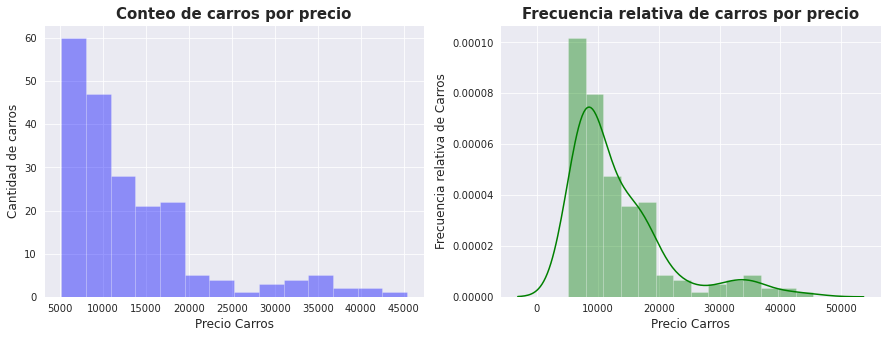

In [359]:
# tamano de los graficos y cantidad de grilla
fig, ax= plt.subplots(1,2,figsize=(15,5))

# Histograma
sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Precio Carros')
ax[0].set_ylabel('Cantidad de carros',size=12)
ax[0].set_title('Conteo de carros por precio',size=15,weight="bold")

# Grafico de densidad
sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Precio Carros')
ax[1].set_ylabel('Frecuencia relativa de Carros', size=12)
ax[1].set_title('Frecuencia relativa de carros por precio', size=15, weight='bold');

- El precio tiene un sesgo positivo. Sin embargo, la mayoria de los carros tienen precios bajos.

- Entre 105 y 107 carros tienen un precio inferior a 10.000. Representan mas del 50%.

- Entre 68 y 70 carros tienen precio entre 10.000 y 20.000. Representan cerca del 35%.

- Alrededor del 85% de los carro tienen un precio entre 5.000 y 20.000 dolares.

- El grafico derecho sugiere que hay 2 distribuciones, una para carros con precios entre 5.000 y 25.000 y otra para carros de mas de 25.000

# Seccion 2. Exploracion de los Datos

## Relacion entre variables

Veamos como se relacionan las variables predictoras con la variable objetivo.

In [360]:
# seleccionar variables predictoras numericas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Eliminamos la variable *symboling* debido a que es de tipo categorica y *car_ID* ya que es un indice de los registros

In [361]:
df_numeric = df_numeric.drop(['symboling', 'car_ID'], axis=1)
df_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Cruzemos todas las variables entre si mediante graficos de dispersion para observar el tipo de relacion con la variable objetivo.

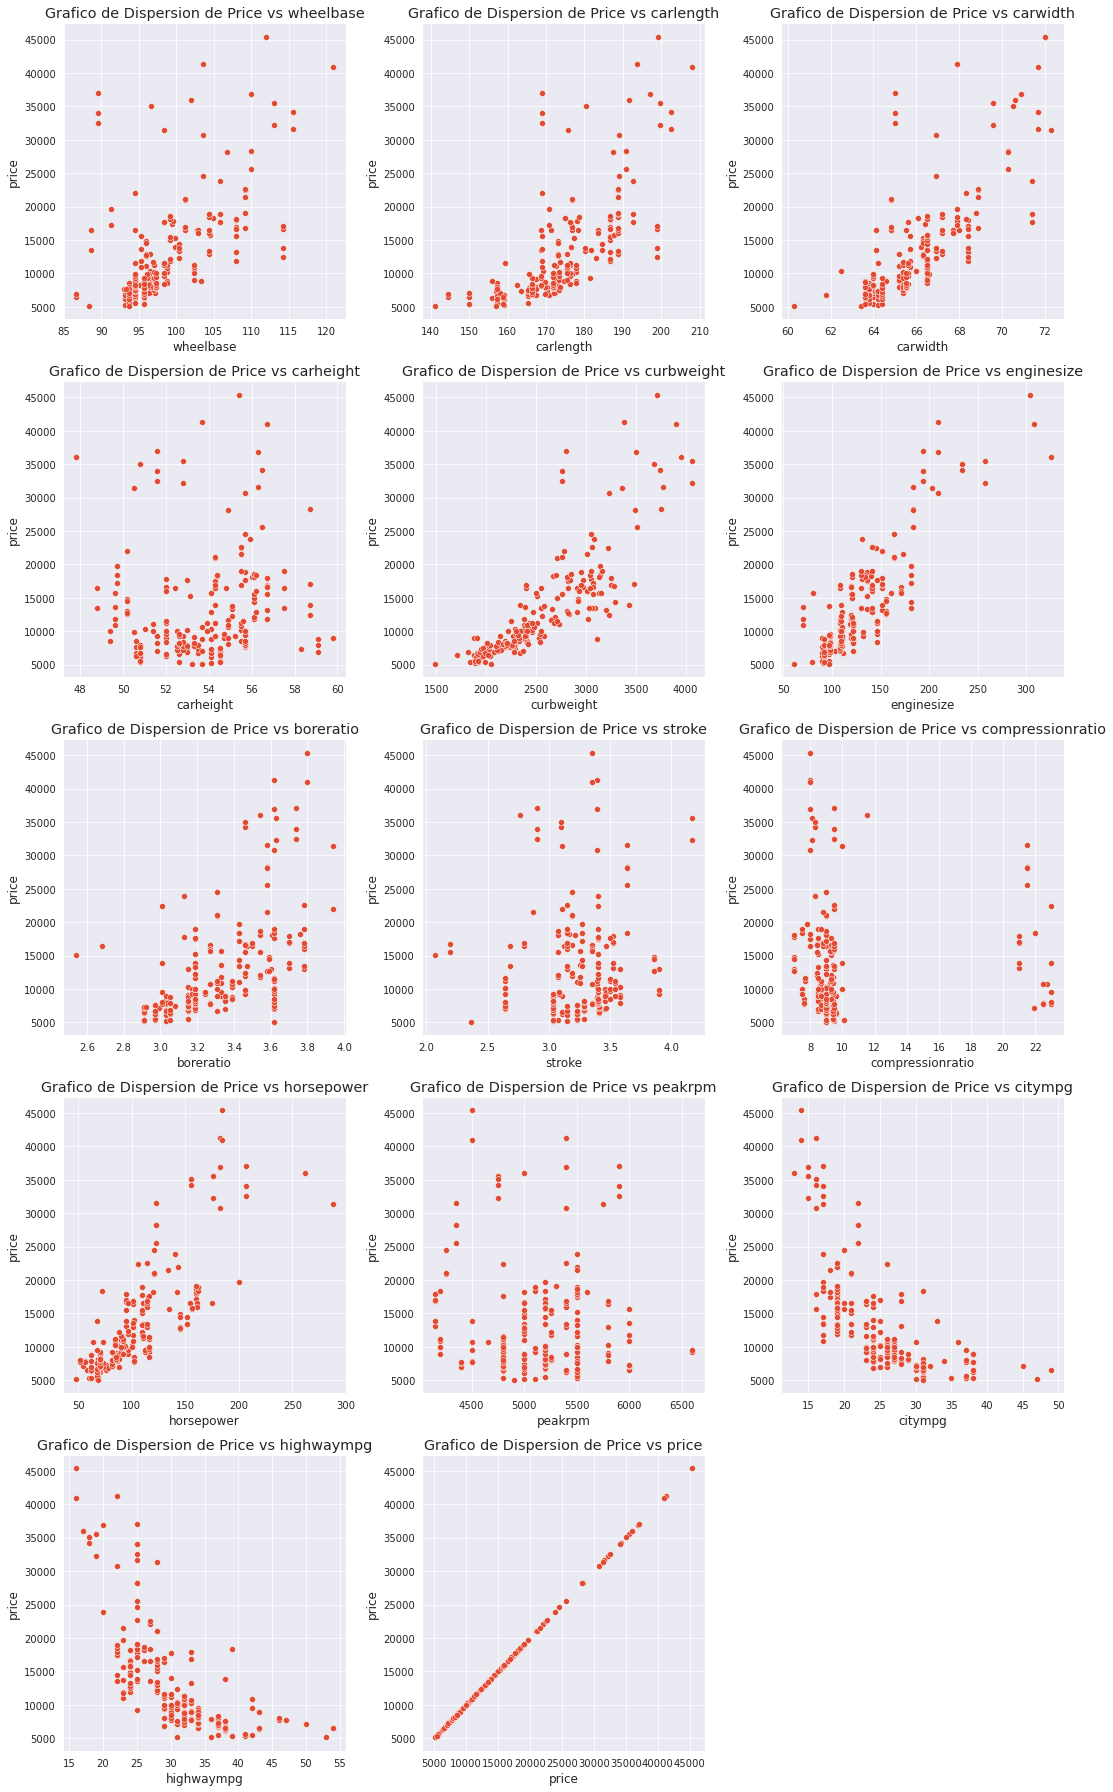

In [362]:
# Número de columnas predictoras
num_cols = len(df_numeric.columns) - 1
# Número de filas necesarias para una grilla de 3 columnas
num_rows = (num_cols + 2) // 3  
# Crear una grilla de subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):  
    # grafico de dispersion de cada variable objetivo con price    
    sns.scatterplot(x=df_numeric[col], y=df_numeric['price'], ax=axes[i])
    axes[i].set_title(f'Grafico de Dispersion de Price vs {col}')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Las variables que presentan una relacion lineal con *Price* son: ancho del carro (carwidth), peso en vacio (curbweight), tamaño del motor (enginesize), caballos de fuerza (horsepower), perforacion (boreration) y mpg en ciudad (citympg) 

- Las demas variables no tienen relaciones lineales fuertes con el precio o ningun tipo de relacion.
 

## Matriz de Correlacion

Veamos, analiticamente, la relacion lineal entre las variables mediante la matriz de correlacion 

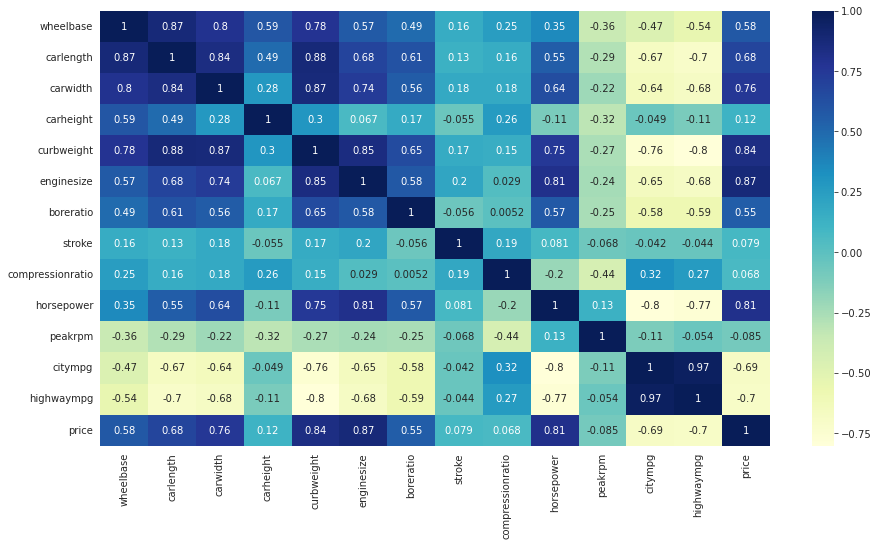

In [363]:
corr = df_numeric.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

### Conclusiones:

**1.- Variable dependiente con las variables independientes**
> Las variables con correlacion positiva con Price son enginesize, curbweight, horsepower y carwidth. Todas estas variables  representan el tamano, peso y potencia del motor del carro.

> Las variables con correlacion negativa  con Price son citympg y highwaympg. Esto sugiere que los carros con alto kilometraje pueden caer en la categoria de 'Economicos'. Es decir, los carros de bajo precio tienen en su mayoria mpg altos.

**2.- Correlacion entre variables independientes**
> Debemos tener en cuenta que muchas variables independientes estan correlacionadas. Esto indica un problema de multicolinealidad que podria perjudicar el rendimiento del modelo. Variables como wheelbase, carlength, curbweight, enginesize, entre otros son medidas de tamaño y peso y estan correlacionados positivamente.

# Seccion 3: Limpieza de Datos

## Conversion de variables

In [364]:
# veamos un resumen de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

La variable *symboling* es de tipo numerica. Sin embargo, ya vimos que es una variable categorica por lo que debemos cambiar su tipo. 

In [365]:
# convertir symboling a categorica
df['symboling'] = df['symboling'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Arreglar valores de variables

Veamos los nombres de los carros *CarName*

In [366]:
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Vamos a obtener solamente el nombre de la marca de carro. Para ello, creamos una nueva columna y obtendremos solo la primera palabra de cada valor que corresponde a la marca.

In [367]:
name_car = df['CarName'].apply(lambda x: x.split(' ')[0])
name_car[:5]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

Agregamos la nueva columna al DataFrame y verificamos los valores de marcas unicas.

In [368]:
df['car_company'] = name_car
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Observamos que hay marcas de carros duplicadas como *toyota* y *toyouta*. Vamos a corregir la ortografia de las marcas 

In [369]:
# volkswagen
df.loc[(df['car_company']=='vw')|(df['car_company']=='vokswagen'), "car_company"] = "volkswagen"

# porsche
df.loc[(df['car_company']=='porcshce'), 'car_company'] = 'porsche'

# toyota
df.loc[(df['car_company']=='toyouta'), 'car_company'] = 'toyota'

# nissan
df.loc[(df['car_company']=='Nissan'), 'car_company'] = 'nissan'

# mazda 
df.loc[(df['car_company']=='maxda'), 'car_company'] = 'mazda'

# veriquemos nuevamente los valores unicos
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

Ya estan completamente corregidos. Ahora, eliminamos la columna *CarName* ya que no nos proporcina informacion de interes

In [370]:
# eliminar CarName
df = df.drop('CarName', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Seccion 4: Preparacion de los datos

Separamos las variables predictoras y la variable objetivo

In [371]:
# variables predictoras
X = df.drop(columns=['price', 'car_ID'])

# variable objetivo
y = df['price']

In [372]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [373]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Seleccionamos del grupo de variables predictoras, las variables categoricas

In [374]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Hay 11 variables categoricas que son predictoras. Ahora creamos variables ficticias para cada variable categorica seleccionada

In [375]:
# variables ficticias de las categoricas
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


De las 11 variables categoricas, obtuvimos un total de 55 variables ficticias. Ahora eliminamos las variables categoricas del DataFrame

In [376]:
X = X.drop(columns=cars_categorical)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


Vemos que quedan 13 variables de tipo numerica en las variables predictoras. Ahora, vamos a juntar las variables predictoras que quedaron con las variables ficticias correspondiente a las categoricas.

In [377]:
dfX = pd.merge(X, cars_dummies, left_index=True, right_index=True)
dfX.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [378]:
# nombre de las columnas
dfX.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


# Seccion 5: Escalando las variables

Escalamos las variables para facilitar la interpretacion de los coeficientes. Con esto buscamos que las variables posean valores entre -1 y 1.

In [379]:
# libreria para escalar
from sklearn.preprocessing import scale

# almacenar los nombres de las columnas en una variable para recuperarlos nuevamente
cols = dfX.columns
# al escalar el df se convierte en un array de numpy
dfX_scaled = pd.DataFrame(scale(dfX))
# recuperamos los nombres de las variables
dfX_scaled.columns = cols

dfX_scaled.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


Verifiquemos que todas las variables numericas tengan media de cero o cercano a cero y desviacion estandar de 1

In [380]:
dfX_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,...,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,...,3.223180e+00,4.199567e+00,5.318432e+00,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.325134e+00,4.010403e+00,4.199567e+00


Ahora, dividimos los datos en dos grupos: entrenamiento y de prueba

In [381]:
# libreria para dividir los datos
from sklearn.model_selection import train_test_split

# divimos los datos en 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, train_size=0.7, test_size=0.3, random_state=100)


# Seccion 6: Construccion del Modelo y evaluacion de desempeño

Dado que la variable dependiente *Price* parece estar relacionado lienalmente con la mayoria de las variables predictoras, vamos a utilizar la Regresion Lineal. Creamos un modelo de regresion lineal que utilice todas las variables.

In [382]:
# librerias para crear un modelo de regresion lineal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# creamos el modelo
lm = LinearRegression()
# entrenamos el modelo con los datos de entrenamiento
lm = lm.fit(X_train, y_train)

Evaluamos el desempeno del modelo mediante el calculo de las metricas que se hara a traves de la siguiente funcion:

In [383]:
def Metricas_Modelo(model_train, model_name, X_train, y_train, X_test, y_test, descrip=' '):
    '''
    Funcion que permite calcular R-cuadrado y RMSE del modelo entrenado que se le pasa
    tanto para los datos de entrenamiento como los de prueba. Los parametros solicitados
    son:
    - model_train: objeto que contiene el modelo entrenado con los datos de entrenamiento
    - model_name: nombre del modelo para distinguirlo del resto
    - X_train: variables predictoras de entrenamiento
    - y_train: variable objetivo de entrenamiento
    - X_test: variables predictoras de prueba
    - y_test: variable objetivo de entrenamiento
    - descrip: mensaje para describir el modelo
    '''
    
    # generamos la prediccion del modelo con los datos de entrenamiento
    pred_train = model_train.predict(sm.add_constant(X_train))
    
    # metricas para los datos de entrenamiento
    r_train = r2_score(y_train, pred_train)
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = (MSE_train)**0.5
    
    # generamos prediccion con datos de prueba
    Xnew = sm.add_constant(X_test)
    pred_test = model_train.predict(Xnew)
    
    # metricas para los datos de prueba
    r_test = r2_score(y_test, pred_test)
    MSE_test = mean_squared_error(y_test, pred_test)
    RMSE_test = (MSE_test)**0.5
    
    # creamos un diccionario con las metricas del modelo
    dict_metrics = {
        'Modelo': model_name,
        'R-cuadrado_train': [r_train.round(3)],
        'RMSE_train': [RMSE_train.round(3)],
        'R-cuadrado_test': [r_test.round(3)],
        'RMSE_test': [RMSE_test.round(3)],
        'Descripcion': descrip
    }
    
    # retornamos un dataframe con las metricas del modelo
    return pd.DataFrame(dict_metrics)

Creamos una descripcion del modelo para luego pasarla, junto con los demas parametros requeridos, a la funcion antes creada. 

In [384]:
descripcion = 'Todas las variables'
metricas_modelo1 = Metricas_Modelo(lm, 'Modelo 1', X_train, y_train, X_test, y_test, descripcion)
metricas_modelo1

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 1,0.976,1213.002,0.838,3365.465,Todas las variables


> El alto valor de R cuadrado en el entrenamiento y su amplia diferencia con el R cuadrado de los datos de prueba indica un sobreajuste del modelo. Vamos a utlizar la eliminacion recursiva de caracteristicas para reducir la dimensionalidad y asi reducir el overfitting.

# Seccion 7: Seleccion de variables usando RFE

Vamos a determinar el numero optimo de variables. Recordemos que tenemos 67 variables predictoras. Lo que hacemos es crear modelos con diferentes variables predictoras seleccionadas por RFE iniciando en 4 hasta llegar a 68 variables y a cada modelo se calcula las respectivas metricas. Todo ello, lo haremos mediante la siguiente funcion.

In [385]:
from sklearn.feature_selection import RFE

def Modelos_Metricas_RFE(n_inicial, n_final, X_train, y_train, X_test, y_test):
    
    for n_features in  range(n_inicial, n_final):
        
        # creamos el modelo
        lm = LinearRegression()
        # especificamos la cantidad de variables en RFE
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
         # ajustar el modelo RFE con n variables
        rfe_n.fit(X_train, y_train)
        # guardamos variables seleccionadas por rfe_n
        col_n = X_train.columns[rfe_n.support_]
        # seleccionamos los datos de entrenamiento y de prueba para las n variables seleccionadas
        X_train_rfe_n = X_train[col_n]
        X_test_rfe_n = X_test[col_n]
         # agrega una constante al modelo que representa el intercepto
        X_train_rfe_n = sm.add_constant(X_train_rfe_n)
        X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
        # entrenamos un nuevo modelo con los datos de entrenamiento
        lm_n = lm.fit(X_train_rfe_n, y_train)
        
         
        if (n_features - n_inicial) == 0: 
            Modelos_RFE = Metricas_Modelo(lm_n, f'{n_features} variables', X_train_rfe_n, y_train, X_test_rfe_n, y_test, n_features)
        else:
            Modelos_RFE_s = Metricas_Modelo(lm_n,f'{n_features} variables' , X_train_rfe_n, y_train, X_test_rfe_n, y_test, n_features)            
            Modelos_RFE = pd.concat([Modelos_RFE, Modelos_RFE_s], ignore_index=True)
            
    return Modelos_RFE
        

In [386]:
df_RFE = Modelos_Metricas_RFE(4, 66, X_train, y_train, X_test, y_test)
df_RFE

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,4 variables,0.837,3139.984,0.865,3072.217,4
1,5 variables,0.886,2621.196,0.888,2799.293,5
2,6 variables,0.891,2571.205,0.885,2836.086,6
3,7 variables,0.896,2505.390,0.887,2814.680,7
4,8 variables,0.907,2368.638,0.898,2673.842,8
...,...,...,...,...,...,...
57,61 variables,0.839,3124.898,0.722,4412.391,61
58,62 variables,0.889,2588.682,0.837,3376.433,62
59,63 variables,0.889,2589.020,0.828,3475.265,63
60,64 variables,0.788,3583.097,0.721,4421.512,64


Una vez que hemos evaluado el modelo desde 4 variables hasta 30 y obtenido de cada uno sus metricas, vamos a graficar R cuadrado y RMSE en funcion de la cantidad de variables para determinar el numero optimo de variables para el modelo de regresion

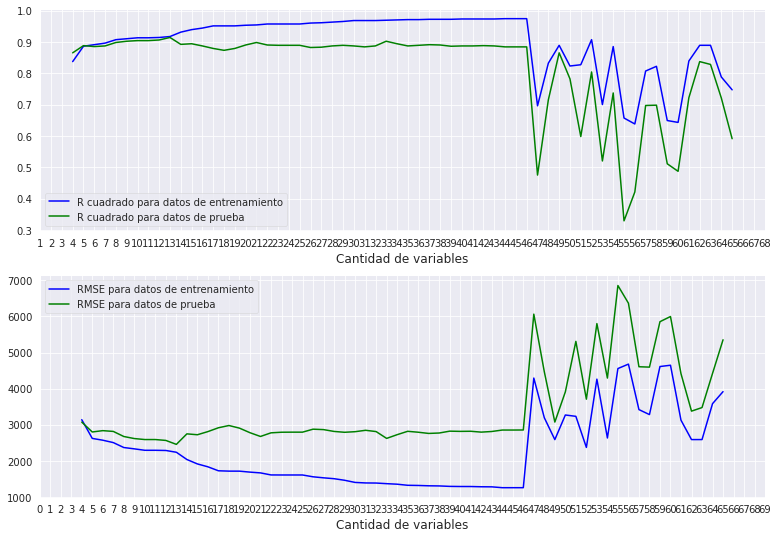

In [387]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# grafico de R cuadrado
ax[0].plot(df_RFE['Descripcion'], df_RFE['R-cuadrado_train'], 'b', label='R cuadrado para datos de entrenamiento')
ax[0].plot(df_RFE['Descripcion'], df_RFE['R-cuadrado_test'], 'g', label='R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='lower left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)
# grafico de RMSE
ax[1].plot(df_RFE['Descripcion'], df_RFE['RMSE_train'], 'b',label="RMSE para datos de entrenamiento")
ax[1].plot(df_RFE['Descripcion'], df_RFE['RMSE_test'], 'g',label="RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 70, step=1))
ax[1].grid(True);


> El R cuadrado para datos de prueba alcanza su punto maximo en 13 variables predictoras y en este punto el modelo se generaliza bien ya que el R cuadrado para datos de entrenamiento esta muy cerca del de prueba. El R cuadrado de entrenamiento mas alla de 13 variables sigue aumentando de valor pero el modelo pierde generalizacion.

> El RMSE para datos de prueba es el mas bajo con 13 variables. Mientras que el RMSE para datos de entrenamiento siguen disminuyendo mas alla de 13 variables pero nuevamente existe un equilibrio entre la cantidad de variables seleccionadas y el rendimiento el modelo. Por tanto, nos quedamos con las 13 variables

# Seccion 8: Construir un modelo con las variables optimas

A partir de las 13 variables seleccionadas, construimos un nuevo modelo de regresion lineal.

In [388]:
# objeto de la Regresion
lm = LinearRegression()

# aplicar RFE al modelo
rfe = RFE(estimator=lm, n_features_to_select=13)

# ajustar el modelo a los datos de entrenamiento
rfe.fit(X_train, y_train)

# obtener los nombres de las 13 variables seleccionadas
col = X_train.columns[rfe.support_]

col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_twelve', 'cylindernumber_two',
       'car_company_bmw', 'car_company_porsche'],
      dtype='object')

In [389]:
# crear nueva df con las 13 caracteristicas seleccionadas por RFE
X_train_13 = X_train[col]
X_test_13 = X_test[col]

# agregar una constante al modelo que representa el intercepto
X_train_13 = sm.add_constant(X_train_13, has_constant='add')
X_test_13 = sm.add_constant(X_test_13, has_constant='add')

# crear nuevo modelo y ajustarlo el modelo a los datos seleccionados
lm_sm = sm.OLS(y_train, X_train_13).fit()

# predicciones del nuevo modelo
y_pred_train = lm_sm.predict(X_train_13)
y_pred_test = lm_sm.predict(X_test_13)


In [390]:
# -------- Evaluacion de las metricas del modelo

# R cuadrado
train_r2 = lm_sm.rsquared
test_r2 = r2_score(y_pred_test, y_test)

# RMSE
error_test = y_pred_test - y_test
error_train = y_pred_train - y_train

test_RMSE = (((error_test**2).mean())**0.5)
train_RMSE = (((error_test**2).mean())**0.5)

# mostrar resultados
print('--------------------- R cuadrado ----------------------------')
print(f'R cuadrado de Prueba: {test_r2}')
print(f'R cuadrado de entrenamiento: {train_r2}')

print('--------------------- RMSE ----------------------------')
print(f'RMSE de Prueba: {test_RMSE}')
print(f'RMSE de entrenamiento: {train_RMSE}')

# resumen del modelo
print(lm_sm.summary())

--------------------- R cuadrado ----------------------------
R cuadrado de Prueba: 0.9006167424476536
R cuadrado de entrenamiento: 0.9172871967113265
--------------------- RMSE ----------------------------
RMSE de Prueba: 2455.65525524788
RMSE de entrenamiento: 2455.65525524788
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           3.47e-64
Time:                        12:07:22   Log-Likelihood:                -1305.9
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     130   BIC:                             2676.
Df Model:                          12                                         
Covarianc

> Los valores de R cuadrado son altos y cercanos

> Los valores de RMSE se acercan mucho entre si lo que indica que el modelo generaliza bien.

Mediante el siguiente grafico, comparemos las predicciones con los valores reales para ver su comportamiento.

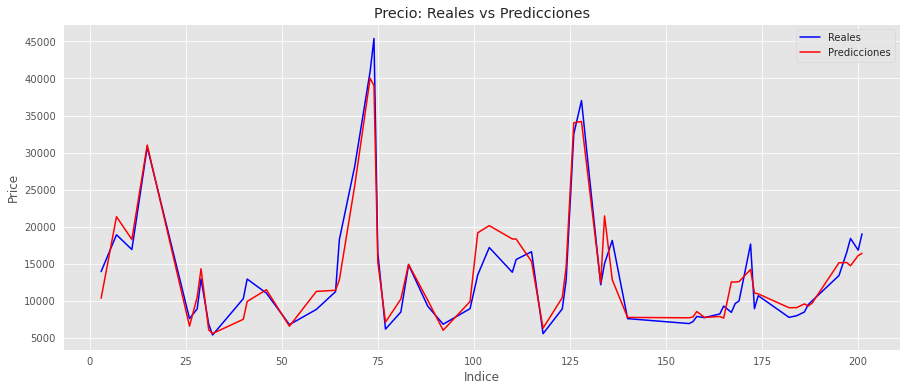

In [391]:
# estilo del grafico
plt.style.use('ggplot')
# tamano del grafico
fig, ax = plt.subplots(figsize=(15,6))
# graficos de linea
sns.lineplot(x=y_test.index, y=y_test, label='Reales', color='blue', ax=ax)
sns.lineplot(x=y_test.index, y=y_pred_test, label='Predicciones', color='red', ax=ax)
ax.set_title('Precio: Reales vs Predicciones')
ax.set_ylabel('Price')
ax.set_xlabel('Indice');

> Vemos que las predicciones se asemeja mucho a gran parte del comportamiento de los datos reales lo que muestra la calidad del modelo.

In [392]:
# mostrar las 13 variables seleccionadas por RFE
X_train_13[col].head()

,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_porsche
122,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
125,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,6.324555
166,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
1,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
199,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114


# Seccion 9: Validar los Supuestos de la regresion lineal

## Linealidad
Para detectar la linealidad, inspeccionamos el grafico de valores observados vs predichos o de los residuos frente a los valores predichos. El resultado esperado para que se cumpla la linealidad es que los puntos se distribuyan simetricamente alrededor de una lineal diagonal en el primer grafico o uniformemente alrededor de una linea horizontal en el ultimo.

In [393]:
# importamos las funciones para evaluar los supuestos
#%run Funciones_Supuestos.ipynb

In [394]:
# funcion para evaluar linealidad
def linealidad(modelo, val_obs):
    
    # valores predichos por el modelo
    predict_val = modelo.predict()
    # residuales
    residuals = modelo.resid
    
    # estilo de las graficas
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(15,4))

    # grafica de Valores observados vs predichos
    sns.regplot(x=predict_val, y=val_obs, lowess=True, ax=ax[0], line_kws={'color': 'blue'})
    ax[0].set_title('Valores observados vs. Predichos', fontsize=16)
    ax[0].set_xlabel('Valore Predichos', fontsize=13)
    ax[0].set_ylabel('Observados', fontsize=13)
    
    # Grafico de valores predichos vs Residuales
    sns.regplot(x=predict_val, y=residuals, lowess=True, ax=ax[1], line_kws={'color': 'blue'})
    ax[1].set_title('Residuales vs. Valores Predichos', fontsize=16)
    ax[1].set_xlabel('Valores predichos', fontsize=13)
    ax[1].set_ylabel('Residuales', fontsize=13)   
     

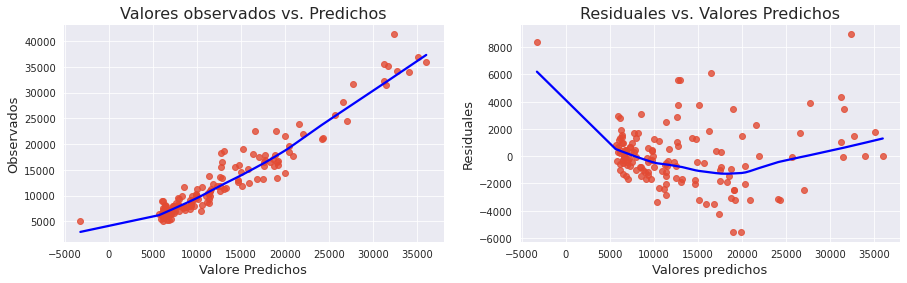

In [395]:
linealidad(lm_sm, y_train)

> La primera grafica muestra que la mayoria de los puntos estan cerca de la diagonal, sin embargo alguno se alejan lo cual es un problema para la linealidad.

> La segunda grafica no proporciona una evidencia concluyente de que los residuos esten dispersos uniformemente alrededor de la linea cero. Los valores aumentan con el aumento de los valores predichos, por tanto no se puede confirmar que se cumpla el supuesto de linealidad. La presencia de valores atipicos puede estar afectando la linealidad: puntos fuera del rango -6000 a 6000 podrian ser valores atipicos influyentes.

## Normalidad

Cuando este supuesto es violado, surgen problemas al calcular los intervalos de confianza y diversas pruebas de significancia para los coeficientes. Cuando la distribucion del error se aleja significativamente de la gaussiana, los invervalos de confianza pueden ser demasiado amplios o estrechos. Algunas posibles razones de la anormalidad en los residuos son:

> Presencia de outlier.

> Presencia de otros problemas con los supuestos.

> Otro modelo podria ser mas adecuado para el problema.

Vamos a evaluar la Normalidad de los residuos a traves de un Grafico Q-Q y 4 pruebas estadisticas con la siguiente funcion:

In [396]:
# libreria para las pruebas estadisticas
from scipy import stats

def normalidad(modelo):
    '''
    Funcion que dibuja el grafico Q-Q de los residuos y ejecuta 4 pruebas estadisticas
    para investigar la normalidad de los residuos
    
    parametro: modelo OLS ajustado
    '''
    
    # Grafico Q-Q
    sm.ProbPlot(modelo.resid).qqplot(line='s');
    plt.title('Grafico Q-Q');
    
    # calculo de pruebas estadisticas
    # Jarque-Bera
    jb = stats.jarque_bera(modelo.resid)
    # Shapiro-Wilk
    sw = stats.shapiro(modelo.resid)
    # Anderson-Darling
    ad = stats.anderson(modelo.resid, dist='norm')
    # Kolmogorov-Smirnov
    ks = stats.kstest(modelo.resid, 'norm')
    
    print(f'Prueba Jarque-Bera --- Estadistico: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Prueba Shapiro-Wilk --- Estadistico: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Prueba Kolmogorov-Smirnov --- Estadistico: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Prueba Anderson-Darling --- Estadistico: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('Si el estadístico Anderson-Darling es mayor que el valor crítico, se rechaza la hipótesis nula de que los datos provienen de una distribución normal al nivel de significancia del 5%.')

    

Prueba Jarque-Bera --- Estadistico: 61.7387, p-value: 3.9190872769268026e-14
Prueba Shapiro-Wilk --- Estadistico: 0.9427, p-value: 0.0000
Prueba Kolmogorov-Smirnov --- Estadistico: 0.5455, p-value: 0.0000
Prueba Anderson-Darling --- Estadistico: 1.9842, 5% critical value: 0.7660
Si el estadístico Anderson-Darling es mayor que el valor crítico, se rechaza la hipótesis nula de que los datos provienen de una distribución normal al nivel de significancia del 5%.


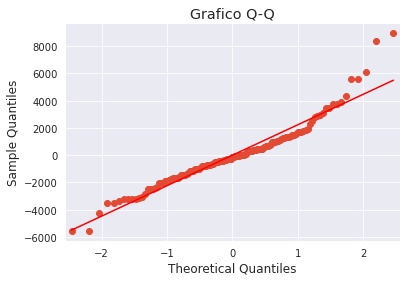

In [397]:
# Evaluamos la normalidad del modelo
normalidad(lm_sm)

> La grafica muestra que los residuales se ajustan muy bien en la mayoria de la diagonal excepto en los extremos. Ademas, el p-value indica que no cumple con el supuesto de normalidad.

> En las pruebas estadisticas vemos que el p-value de jb, sw y ks son menores al umbral (0.05). Ademas el p-value de ad es mayor a 0.05. Todos estos resultados indican que se rechaza la hipotesis nula de que los errores tienen una distribucion normal.

El motivo de estos resultados podrian ser la presencia de valores atipicos.

# Seccion 10: Identificacion de outliers y puntos de gran influencia

Vamos a crear una funcion que nos permita detectar valores atipicos o puntos de gran influencia en los datos.

In [398]:
def prueba_influencia_outlier(modelo, cantidad_obs_buscadas):
    '''
    Funcion que detecta un numero de observaciones de gran influencia para el modelo
    parametros: el modelo entrenado (*modelo*) y la cantidad de observaciones buscadas (*cantidad_obs_buscadas*)
    '''
    
    # obtener influencia de cada obs
    influencia = modelo.get_influence()
    # calcular valores de apalancamiento de cada obs
    leverage = influencia.hat_matrix_diag
    # calcular la distancia de cook de cada obs
    cooks_d = influencia.cooks_distance
    # calcular residuos estandarizados internos: residuales/std de residuales
    standarized_residuals = influencia.resid_studentized_internal
    # calcular residuos studentizados externos
    studentized_residuals = influencia.resid_studentized_external
    
    # Grafico de residuos estandarizados vs apalancamienta
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standarized_residuals, alpha=0.5)
    sns.regplot(leverage, standarized_residuals, scatter=False, ci=False, lowess=True,
               line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage) + 0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Residuales Estandarizados vs Apalancamiento', fontsize=16)
    plot_lm.axes[0].set_xlabel('Apalancamiento', fontsize=13)
    plot_lm.axes[0].set_ylabel('Residuales Estandarizados', fontsize=13)
    
    # identificar las obs mas influyentes
    # ordena las obs por su distancia de cook en orden descendente
    leverage_obs = np.flip(np.argsort(cooks_d)[0], 0)[:cantidad_obs_buscadas]
    # etiqueta las obs mas influyentes
    for i in leverage_obs:
        plot_lm.axes[0].annotate(i, xy=(leverage[i], studentized_residuals[i]))
        
    # funcion que traza los contornos de la distancia de cook
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')
        
    # numero de parametros del modelo
    p = len(lm_sm.params)
    
    # trazar la linea de contorno de cook
    graph(lambda x: np.sqrt((0.5*p*(1-x))/x), np.linspace(0.001, max(leverage), 50), 'Distancia de Cook')
    plt.legend(loc='upper right')

Veamos las 10 observaciones mas influyentes

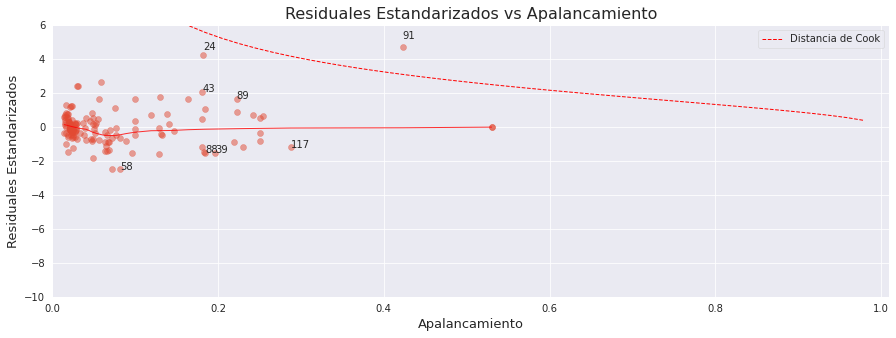

In [399]:
prueba_influencia_outlier(lm_sm, cantidad_obs_buscadas=10)

> Encontramos que las observaciones 16 y 91 estan por encima de la linea de distancia de cook, por lo que deben eliminarse. El punto 24, a pesar de estar por debajo de la linea de distancia de cook, tiene un alto residuo por lo que lo eliminamos tambien.

Ahora, removemos los outliers antes detectados

In [400]:
X_train_no_out = X_train.drop(index=[16,24,91])
y_train_no_out = y_train.drop(index=[16,24,91])

X_train_no_out.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-1.331531,-0.081241,-0.187398,-0.915571,...,-0.310253,-0.23812,5.318432,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
125,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,2.258638,-0.464834,-0.162161,0.985685,...,-0.310253,-0.23812,-0.188025,6.324555,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
166,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.332206,-0.560733,-0.187398,0.199833,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,2.325134,-0.249351,-0.238120
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
199,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074252,-0.336970,-0.666913,1.467337,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567


# Seccion 11: Construir un modelo con los nuevos datos seleccionando las variables con RFE.

Vamos a determinar el numero optimo de variables con RFE, realizado anteriormente pero esta vez utilizando el nuevo conjunto de datos *X_train_no_out, y_train_no_out*

In [401]:
# libreria para seleccion de variables
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# lista de variables optimas: entre 4 y 30
n_features_list = list(range(4,31))
# lista para almacenar el R cuadrado ajustado de cada cantidad de variable
train_adjusted_r2 = []
# lista para almacenar el r cuadrado de los datos de entrenamiento
train_r2 = []
# lista para almacenar el r cuadrado de los datos de prueba
test_r2 = []
# lista para almacenar el RMSE de los datos de entrenamiento
train_RMSE = []
# lista para almacenar el RMSE de los datos de prueba
test_RMSE = []

# Vamos entrenando el modelo iniciando en 4 variables hasta llegar a 30
# y guardamos cada metrica resultante
for n_features in range(4, 31):
    
    # RFE con n variables
    lm = LinearRegression()
    
    # Especificar el numero de variables
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
    
    # ajustar el modelo RFE con n variables
    rfe_n.fit(X_train_no_out, y_train_no_out)
    
    # seleccionando variables seleccionadas por rfe_n
    col_n = X_train_no_out.columns[rfe_n.support_]
    # support_: retorna una matriz de booleanos para indicar si se selecciono un atributo con RFE
    
    # seleccionamos los datos de entrenamiento y de prueba para las n variables seleccionadas
    X_train_rfe_n = X_train_no_out[col_n]
    X_test_rfe_n = X_test[col_n]
    
    # agrega una constante al modelo que representa el intercepto
    X_train_rfe_n = sm.add_constant(X_train_rfe_n, has_constant='add')
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
    
    # ajustar el modelo de regresion lineal con n variables
    lm_n = sm.OLS(y_train_no_out, X_train_rfe_n).fit()
    
    # creamos las predicciones para los datos de entrenamiento y de prueba
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    # ---- Calculo de las metricas
    
    # R cuadrado
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    # RMSE
    error_test = y_pred_test - y_test
    error_train = y_pred_train - y_train_no_out
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

Una vez que hemos evaluado el modelo desde 4 variables hasta 30 y obtenido de cada uno sus metricas, vamos a graficar R cuadrado y RMSE en funcion de la cantidad de variables para determinar el numero optimo de variables para el modelo de regresion.

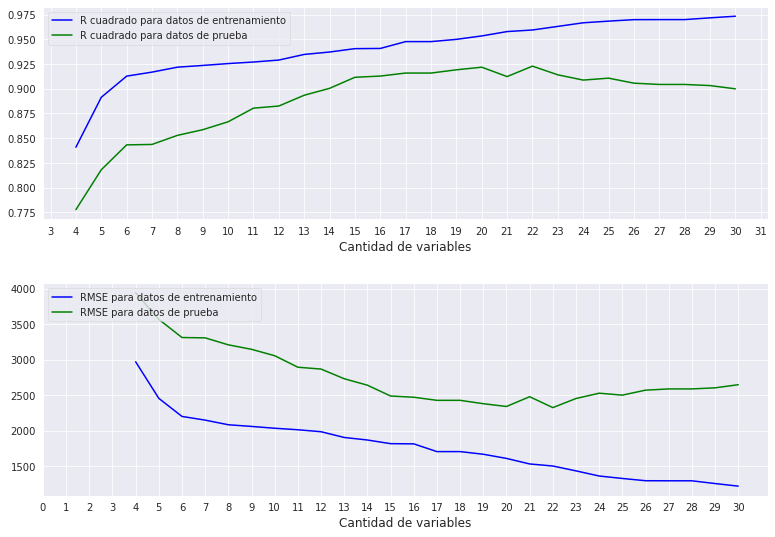

In [402]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
plt.subplots_adjust(hspace = 0.3)

# grafico de R cuadrado
ax[0].plot(n_features_list, train_r2, 'b', label='R cuadrado para datos de entrenamiento')
ax[0].plot(n_features_list, test_r2, 'g', label='R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)
# grafico de RMSE
ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE para datos de entrenamiento")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))
ax[1].grid(True);


> La diferencia entre R cuadrado y RMSE tanto de prueba como de entrenamiento es muy alta lo que indica un alto sobreajuste que hace que el modelo no generalice bien y por tanto genere malas predicciones. No se puede seleccionar una cantidad optima de variables.

Para remediar el sobreajuste entre los datos de entrenamiento y de prueba, vamos a realizar una validacion cruzada de K-Fold para intentar determinar el numero optimo de caracteristicas a utilizar por el modelo.

# Seccion 12: Pre-procesamiento de los datos antes de la validacion cruzada.

Removemos los outliers del datframe tanto de X como de y

In [403]:
X_new_cv = dfX_scaled.drop(index=[16,24,91])
y_new_cv = y.drop(index=[16,24,91])

Restablecemos el indice para que este en el orden correcto al usar K-Fold.

In [404]:
X_new_cv.reset_index(inplace=True, drop=True)
X_new_cv.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [405]:
y_new_cv.reset_index(drop=True, inplace=True)
y_new_cv.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Verificamos las dimensiones de los datos

In [406]:
print(X_new_cv.shape, y_new_cv.shape)

(202, 68) (202,)


# Seccion 13: Aplicando validacion cruzada K-Fold

Vamos a evaluar como varia el rendimiento de un modelo de regresion lineal al seleccionar diferentes cantidades de caracteristicas utilizando RFE y validacion cruzada. Las metricas de rendimiento (R cuadrado y RMSE) se calculan para cada numero de caracteristicas

In [407]:
# libreria para utlizar la validacion cruzada
from sklearn.model_selection import KFold

# definir parametros de la validacion cruzada
K=5 # numero de pliegues

# configurando validacion cruzada
# shuffle para barajar los datos
# semilla para reproducibilidad
kf = KFold(n_splits=K, shuffle=True, random_state=42) 

# iterar sobre un rango de 5 a 30 caracteristicas
for n_features in range(5, 31):
    # inicializar las listas que almacenan las metricas
    train_RMSE = []
    test_RMSE = []
    train_r2 = []
    test_r2 = []
    
    # realizar la validacion cruzada dividiedno los datos en conjuntos de entrenamiento y prueba de cada pliegue
    for train, test in kf.split(X_new_cv):
        # creacion del modelo
        lm = LinearRegression()
        # objeto RFE
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        # entrenar el modelo con RFE
        rfe_n.fit(X_new_cv.loc[train], y_new_cv[train])
        
        # calcular predicciones
        y_pred_train = rfe_n.predict(X_new_cv.loc[train])
        y_pred_test = rfe_n.predict(X_new_cv.loc[test])
        
        # Calcular metricas
        # R cuadrado
        train_r2.append(r2_score(y_pred_train, y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test, y_new_cv[test]))
        
        # RMSE
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train = ((error_train**2).mean())**0.5
        rmse_test = ((error_test**2)).mean()**0.5
        
        # guadrar metricas
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)

    # calcular el cociente de RMSE entre el conjunto de prueba y de entrenamiento
    test_times_train = np.mean(test_RMSE) / np.mean(train_RMSE)
    
    # generar reporte
    print('n_features:{:1} |train_R2:{:2} |test_R2:{:3} |mean(rmse_train):{:4} |mean(rmse_test):{:5} |RMSE(test/train):{}'.
      format(n_features, round(np.mean(train_r2), 4), round(np.mean(test_r2), 4),
             round(np.mean(train_RMSE), 0),
             round(np.mean(test_RMSE), 0), round(test_times_train, 2)))

n_features:5 |train_R2:0.8723 |test_R2:0.8138 |mean(rmse_train):2595.0 |mean(rmse_test):3180.0 |RMSE(test/train):1.23
n_features:6 |train_R2:0.8917 |test_R2:0.8278 |mean(rmse_train):2414.0 |mean(rmse_test):3100.0 |RMSE(test/train):1.28
n_features:7 |train_R2:0.9061 |test_R2:0.8345 |mean(rmse_train):2266.0 |mean(rmse_test):2997.0 |RMSE(test/train):1.32
n_features:8 |train_R2:0.913 |test_R2:0.838 |mean(rmse_train):2188.0 |mean(rmse_test):2964.0 |RMSE(test/train):1.35
n_features:9 |train_R2:0.92 |test_R2:0.8366 |mean(rmse_train):2104.0 |mean(rmse_test):2953.0 |RMSE(test/train):1.4
n_features:10 |train_R2:0.9239 |test_R2:0.8379 |mean(rmse_train):2055.0 |mean(rmse_test):2955.0 |RMSE(test/train):1.44
n_features:11 |train_R2:0.9299 |test_R2:0.8334 |mean(rmse_train):1975.0 |mean(rmse_test):2932.0 |RMSE(test/train):1.48
n_features:12 |train_R2:0.9318 |test_R2:0.8454 |mean(rmse_train):1951.0 |mean(rmse_test):2854.0 |RMSE(test/train):1.46
n_features:13 |train_R2:0.9343 |test_R2:0.8391 |mean(rmse_

> El modelo se sobreajusta a media que aumentamos el numero de caracteristicas (se refleja en la diferencia entre R cuadrado y RMSE en los datos de prueba y de entrenamiento)

> En el modelo con 5 caracteristicas, el rmse_test es un 25% mas que rmse_train, lo que significa que las predicciones sobre los datos de prueba son un 25% mas inexactas. En el modelo con 6 caracteristicas el rmse_test es un 33% mas que rmse_train.

> Para modelos entrenados con mas de 6 caracteristicas, esta diferencia es de mas de 35% lo que supone un sobreajuste masivo.

Para determinar el numero de caracteristicas optimas, que puede estar entre 5 y 6, analizamos la multicolinealidad en ambos casos.

# Posible explicacion del Sobreajuste

Debido a que solo hay 200 observaciones y un total de 68 caracteristicas, no podemos esperar un modelo muy exacto. Segun Jim Frost por cada caracteristicas debe haber al menos entre 10 y 15 observaciones en un modelo lineal. Esto indica que, como minimo, deben haber 680 observaciones en este caso, las cuales no existen lo que lleva a que cada caracteristica no este adecuadamente representada y esto refleja el alto sobreajuste.

# Seccion14: Analisis de Multicolinealidad

Creamos un modelo de regresion lineal de 6 variables con los datos tratados

In [408]:
# objeto del modelo
lm = LinearRegression()
# objeto RFE de 6 variables
rfe = RFE(estimator=lm, n_features_to_select=6)
# ajustar el modelo RFE con los datos tratados
rfe.fit(X_new_cv, y_new_cv)
# nombre de las 6 variables seleccionadas
col = X_new_cv.columns[rfe.support_]
# agrupamos las 6 variables selecciondas
X_final = X_new_cv[col]
# agregamos la constantes del temrino intercepto
X_final = sm.add_constant(X_final, has_constant='add')
# entrenamos el modelo con OLS y lo ajustamos
lm_sm = sm.OLS(y_new_cv, X_final).fit()

lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     225.8
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           6.29e-85
Time:                        12:07:38   Log-Likelihood:                -1886.3
No. Observations:                 202   AIC:                             3787.
Df Residuals:                     195   BIC:                             3810.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.319e+04    196.923     66.972      0.000    1.28e+04    1.36e+04
carwidth             2242.3444    404.788      5.540      0.000    1444.020    3040.669
curbweight           2550.3297    549.448      4.642      0.000    1466.705    3633.954
enginesize           2696.0495    432.265      6.237      0.000    1843.534    3548.565
enginelocation_rear  2034.8873    210.239      9.679      0.000    1620.254    2449.521
enginetype_l         1742.6568    671.800      2.594      0.010     417.731    3067.583
car_company_peugeot -2592.5238    694.150     -3.735      0.000   -3961.529   -1223.519
==============================================================================
Omnibus:                        7.762   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.711
Skew:                           0.402   Prob(JB):                       0.0212
Kurtosis:                       3.519   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Observamos que todos las variables son significativas para el modelo.

## Multicolinealidad de las variables seleccionadas

Definimos una variable que calcule la varianza de los factores inflacionarios (VIF) de cada variable seleccionada.

In [409]:
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

def vif(X_df):
    '''
    parametro X_df: son las caracteristicas a las cuales se les calcula VIF
    '''
    # agregamos la constante del intercepto
    X_df = add_constant(X_df)
    # calculo de VIF para cada variable
    vifs = pd.Series(
        [1/(1 - OLS(X_df[col].values,
        X_df.loc[:, X_df.columns != col].values).fit().rsquared) for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    
    return vifs

In [410]:
# obtener el VIF de las 6 variables seleccionadas
vif(X_final)

const                   1.000162
carwidth                4.229958
curbweight              7.697143
enginesize              4.766423
enginelocation_rear     1.156669
enginetype_l           11.802076
car_company_peugeot    12.601447
Name: VIF, dtype: float64

> Curbweight esta altamente correlacionado con Carwidth con un coeficiente de correlacion de 0.87. Ademas su alto valor de VIF (7.6971) nos indica que podemos eliminarla

In [411]:
X_final = X_final.loc[:, X_final.columns != 'curbweight']
X_final.head()

,const,carwidth,enginesize,enginelocation_rear,enginetype_l,car_company_peugeot
0,1.0,-0.844782,0.074449,-0.121867,-0.249351,-0.23812
1,1.0,-0.844782,0.074449,-0.121867,-0.249351,-0.23812
2,1.0,-0.190566,0.604046,-0.121867,-0.249351,-0.23812
3,1.0,0.136542,-0.431076,-0.121867,-0.249351,-0.23812
4,1.0,0.230001,0.218885,-0.121867,-0.249351,-0.23812


# Seccion 15: Ajuste del modelo nuevamente

In [412]:
# ajuste del modelo con 5 caracteristicas
lm_sm = sm.OLS(y_new_cv, X_final).fit()
# generar predicciones del nuevo modelo
y_prediccion = lm_sm.predict(X_final)
# calculo de RMSE
error = y_prediccion - y_new_cv

print('RMSE is: {}'.format(((error**2).mean())**0.5))
lm_sm.summary()


RMSE is: 2897.577136837461


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.02e-81
Time:                        12:07:38   Log-Likelihood:                -1896.9
No. Observations:                 202   AIC:                             3806.
Df Residuals:                     196   BIC:                             3826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.319e+04    206.983     63.742      0.000    1.28e+04    1.36e+04
carwidth             3338.1784    345.613      9.659      0.000    2656.582    4019.775
enginesize           4040.9160    337.179     11.984      0.000    3375.951    4705.881
enginelocation_rear  1966.5066    220.439      8.921      0.000    1531.769    2401.244
enginetype_l         1706.3069    706.083      2.417      0.017     313.811    3098.803
car_company_peugeot -2154.5144    722.850     -2.981      0.003   -3580.077    -728.952
==============================================================================
Omnibus:                        6.628   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.539
Skew:                           0.439   Prob(JB):                       0.0380
Kurtosis:                       3.078   Cond. No.                         7.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Este modelo tiene una mejoria en comparacion con los anteriores

Vamos a comparar las predicciones con los valores reales para ver su comportamiento.

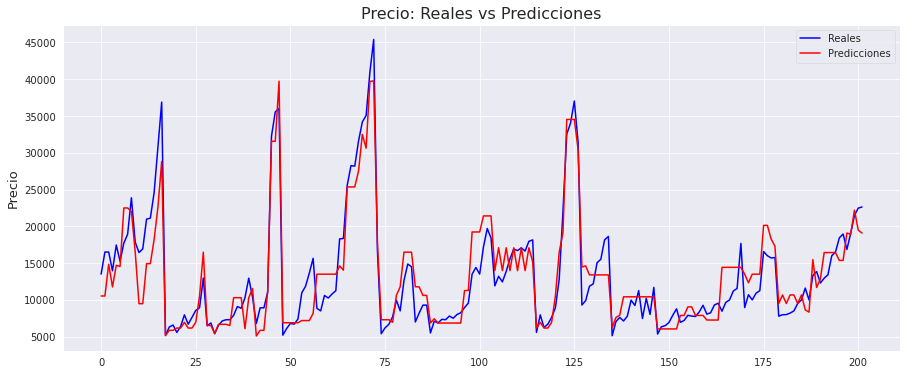

In [413]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x=y_new_cv.index, y=y_new_cv, label='Reales', color='blue', ax=ax)
sns.lineplot(x=y_new_cv.index, y=y_prediccion, label='Predicciones', color='red', ax=ax)
ax.set_title('Precio: Reales vs Predicciones', fontsize=16)
ax.set_ylabel('Precio', fontsize=13);

> El grafico muestra que las predicciones omiten los valores reales en ciertas zonas y es el precio a pagar para que el modelo generalice bien y funcione correctamente con datos nuevos (compensacion de sesgo-varianza)

# Seccion 16: Evaluacion de supuestos para el nuevo modelo

## Linealidad

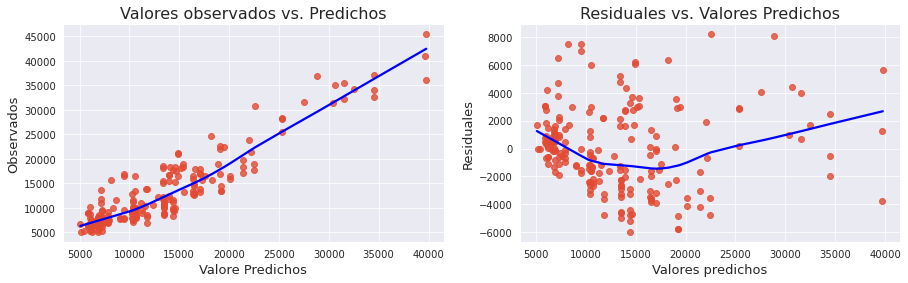

In [414]:
linealidad(lm_sm, y_new_cv)

> El comportamiento lineal es mucho mejor en este modelo.

> Los residuos se ven un poco dispersos uniformemente frente a los valores previstos

## Normalidad

Prueba Jarque-Bera --- Estadistico: 6.5391, p-value: 0.03802295487204754
Prueba Shapiro-Wilk --- Estadistico: 0.9824, p-value: 0.0126
Prueba Kolmogorov-Smirnov --- Estadistico: 0.5149, p-value: 0.0000
Prueba Anderson-Darling --- Estadistico: 0.6878, 5% critical value: 0.7720
Si el estadístico Anderson-Darling es mayor que el valor crítico, se rechaza la hipótesis nula de que los datos provienen de una distribución normal al nivel de significancia del 5%.


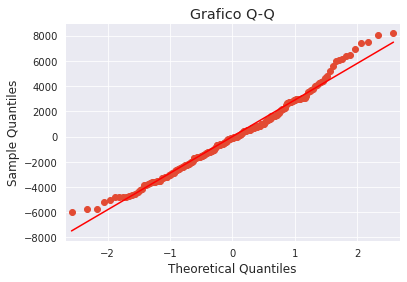

In [415]:
normalidad(lm_sm)

## Prueba de puntos de influencia

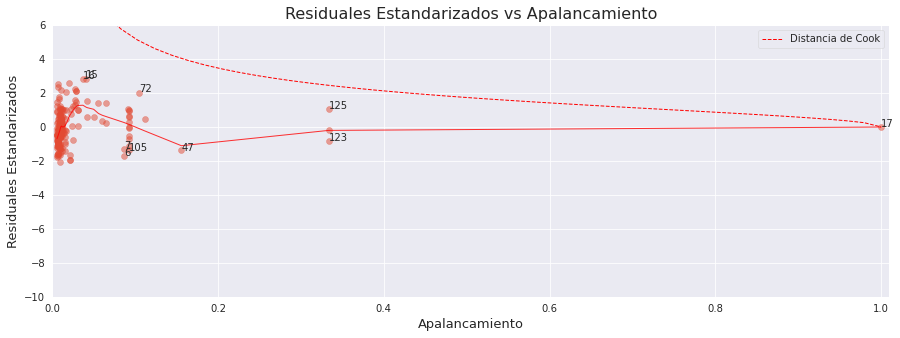

In [416]:
prueba_influencia_outlier(lm_sm, cantidad_obs_buscadas=10)